# Notebook 3: Develop Sequential Model

In Notebook 2, it has labeled the sentiment "positive, negative and neutral" to the standardised sentences which was extracted from 30 UK retailers annual report (pdf file). In addition, the label of these three sentiment has been converted to numeric value which positive is 1, negative is -1, and neutral is 0 respectively.


In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different sequential models by using Tensorflow and Keras.

# Tokenization and padding sequences

In [42]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [43]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [44]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [45]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

Using the global nlp function to visualise the padded sequences.

In [46]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [47]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [48]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [49]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [50]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


# LSTM Model

LSTM, the Long Short-Term Memoary model is one of the sequential models widely used in NLP. It is a variant of recurrent neural network and it is used to process input data in a sequential manner. In NLP, the input sequence can be sentences or paragraph. In details, LSTM can prcess each element of the input seuqnces at a time, and then it maintains an internal memory state that can capture and retain relevant informtion over time. This feature allows LSTM to handle varuing lengths and capture long term dependencies during sentiment analysis.

In addition, LSTM model is slower to train but it can capture the order of the tokens. In sentiment analysis on financial risk, LSTM can capture the temporal dependencies that allows the model to understand the evolution of sentiment over time. Also, it can capture contextual information in paragraph. Sometimes, the sentiment of the sentences can be influenced by preceding sentences. LSTM can incorporate the paragraph or reporting context into the process.

1. Embedding Layer: An input layer, converting the input into dense vectors, the numeric representative of the sentences. It specifiy num_words which is the total number of freqeuent/unique words from the dataset. embedding)dim specifies the dimentionaly of the word embeddings. input length specifies the length of the input sequences, that is usually the maximum sequence length in the dataset.

2. Bidirectional LSTM layer: The bidirectional wrapper allows the LSTM layer to process input sequenences in both forward and backward directions, capturing contextual information from past and future words. lstm_dim means the number of LSTM units in each direction to determines the capacity and complextity of LSTM layer. It is common to use bidirectional LSTM layer in NLP because language is seuqential and the meanding of word can be affected by surrounding words. It gives the model to capture the contextual information. 

3. Dense layer (intermediate layer): Transforming the preceding layer to non-linearity (if use ReLU activation) before the output layer. It can be seen as a linear transformation of the LSTM layer output.

4. Dense layer (output layer): different activation function can generate different number of output. For sigmoid activation, it produce a signle output value between 0 and 1. Since there are 3 sentiment label classification, it will use softmax activation instead.

5. Loss function: measure of model performance, quantifying the discrepancy between predicted output and actual output.

6. Optimizer: determines how the model's weight are being updated. adam is popular optimizer due to faster convergence and improved performance.

7. metrics: performance evaluation. accuracy calcluate the percentage of correct prediction. 

## 1st LSTM model

In [51]:
# Hyperparameters
embedding_dim = 10 # each word will be represented by a dense vextor of specified size
lstm_dim = 12 # number of LSTM units
dense_dim = 12 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences


In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [53]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

In [54]:
# Build the model
lstm_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
lstm_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
lstm_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 10)            5000      
                                                                 
 bidirectional_4 (Bidirectio  (None, 24)               2208      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 12)                300       
                                                                 
 dense_9 (Dense)             (None, 3)                 39        
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________


Since it is processing the complicated dataset and model arhcitecture, it specify 30 epochs and 128 batch size to capture complexity while minising the computational consumption.

In [55]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

lstm_model_1 = lstm_model_1.fit(training_sequences, training_labels_encoded, 
                    epochs=NUM_EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 24s 4ms/step - loss: 0.5382 - accuracy: 0.7502 - val_loss: 0.5065 - val_accuracy: 0.7612
Epoch 2/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.5013 - accuracy: 0.7641 - val_loss: 0.4994 - val_accuracy: 0.7648
Epoch 3/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4950 - accuracy: 0.7667 - val_loss: 0.4960 - val_accuracy: 0.7665
Epoch 4/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4908 - accuracy: 0.7697 - val_loss: 0.4933 - val_accuracy: 0.7683
Epoch 5/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4872 - accuracy: 0.7717 - val_loss: 0.4909 - val_accuracy: 0.7690
Epoch 6/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4844 - accuracy: 0.7735 - val_loss: 0.4888 - val_accuracy: 0.7715
Epoch 7/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4820 - accuracy: 0.7756 - val_loss: 0.4858 - val_ac

Next, it visualises the training accuracy and loss over time after the model training.  

1. Training accuracy: Assessing the model performance accuracy on the training dataset. High accuracy means the model performs well on the training data itself.
2. Validation accuracy: Assessing the model performance on the validation dataset. High validation accuracy means the model performs well on unseen data.
3. Training loss: It can be defined as the measure of model performance fitting on the training data by assessing the discrepancy between predicted and actual value. It could be decreased gradually during the training process when the model is learning to fit the training data.
4. Validation loss: It can be defined as the measure of model generalizing the unseen data.

Overfitting assessment: To assess overfitting, the training loss should be decreasing gradually while the validation loss is increasing.

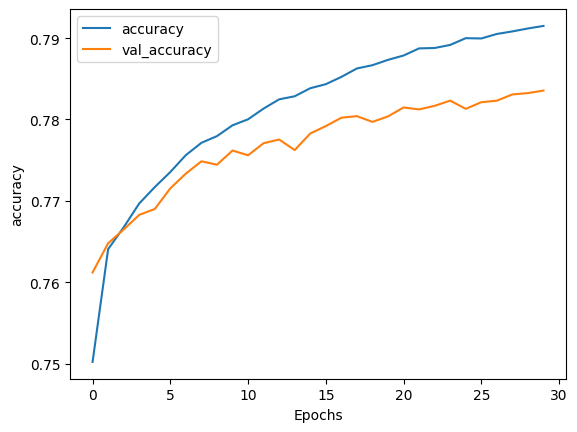

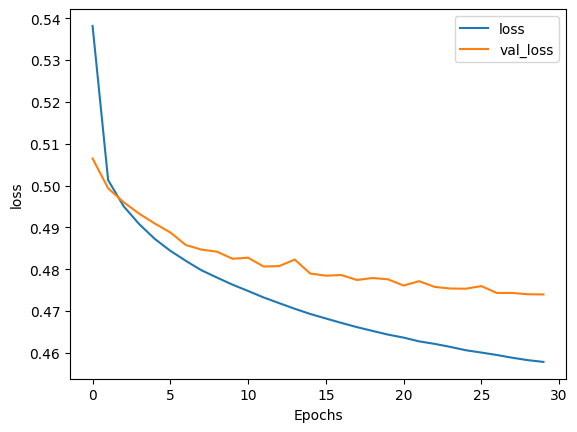

In [83]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
    

# Plot the accuracy and results 
plot_graphs(lstm_model_1, "accuracy")
plot_graphs(lstm_model_1, "loss")


Comment: The model "lstm_model_1" has high training accuracy of 79.1% and validation accuracy of 78.3%. The total training time is approximate 352 seconds (around 6 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

# GRU model

Grated Recurrent Units (GRUs) can be viewed as a simplied version of LSTM due to its simplified model structure such as fewer gates, single hidden state.  

## 1st GRU model 

In [60]:
# Hyperparameters
embedding_dim = 10 # each word will be represented by a dense vextor of specified size
gru_dim = 12 # number of LSTM units
dense_dim = 12 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [65]:
# Import GRU layer from Tensorflow Keras
from tensorflow.keras.layers import GRU

In [68]:
# Build the model
gru_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 10)            5000      
                                                                 
 bidirectional_6 (Bidirectio  (None, 24)               1728      
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 12)                300       
                                                                 
 dense_13 (Dense)            (None, 3)                 39        
                                                                 
Total params: 7,067
Trainable params: 7,067
Non-trainable params: 0
_________________________________________________________________


In [69]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_1 = gru_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 25s 4ms/step - loss: 0.5355 - accuracy: 0.7480 - val_loss: 0.5085 - val_accuracy: 0.7613
Epoch 2/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.5015 - accuracy: 0.7642 - val_loss: 0.4999 - val_accuracy: 0.7636
Epoch 3/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4958 - accuracy: 0.7672 - val_loss: 0.4980 - val_accuracy: 0.7654
Epoch 4/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4921 - accuracy: 0.7686 - val_loss: 0.4937 - val_accuracy: 0.7678
Epoch 5/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4885 - accuracy: 0.7704 - val_loss: 0.4916 - val_accuracy: 0.7691
Epoch 6/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4854 - accuracy: 0.7722 - val_loss: 0.4886 - val_accuracy: 0.7713
Epoch 7/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4827 - accuracy: 0.7740 - val_loss: 0.4883 - val_ac

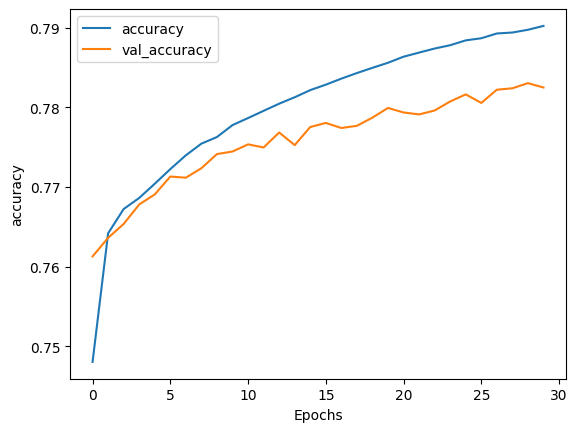

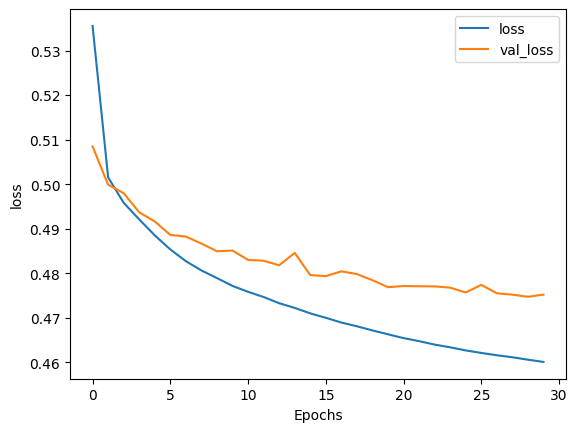

In [84]:
# Plot the accuracy and results 
plot_graphs(gru_model_1, "accuracy")
plot_graphs(gru_model_1, "loss")

Comment: This model has high training accuracy of 79% and validation accuracy of 78.2%. The total training time is approximate 696 seconds (around 11 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

# Convolution model

In [77]:
# Hyperparameters
embedding_dim = 10 # each word will be represented by a dense vextor of specified size
filters = 12 # number of LSTM units
kernel_size = 6
dense_dim = 12 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [79]:
# Build the model
conv_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 10)            5000      
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 12)             732       
                                                                 
 global_average_pooling1d (G  (None, 12)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_14 (Dense)            (None, 12)                156       
                                                                 
 dense_15 (Dense)            (None, 3)                 39        
                                                                 
Total params: 5,927
Trainable params: 5,927
Non-trainable params: 0
____________________________________________________

In [86]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_1 = conv_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4758 - accuracy: 0.7833 - val_loss: 0.4869 - val_accuracy: 0.7766
Epoch 2/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4755 - accuracy: 0.7833 - val_loss: 0.4872 - val_accuracy: 0.7771
Epoch 3/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4754 - accuracy: 0.7833 - val_loss: 0.4864 - val_accuracy: 0.7769
Epoch 4/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4751 - accuracy: 0.7836 - val_loss: 0.4865 - val_accuracy: 0.7765
Epoch 5/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4748 - accuracy: 0.7839 - val_loss: 0.4864 - val_accuracy: 0.7765
Epoch 6/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4748 - accuracy: 0.7837 - val_loss: 0.4872 - val_accuracy: 0.7766
Epoch 7/30
5654/5654 [==============================] - 7s 1ms/step - loss: 0.4746 - accuracy: 0.7838 - val_loss: 0.4869 - val_accuracy:

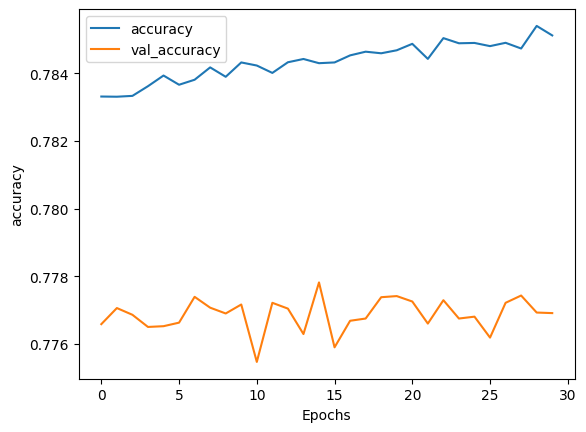

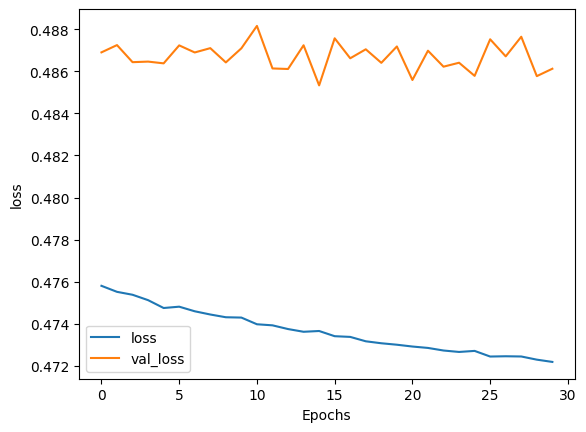

In [87]:
# Plot the accuracy and results 
plot_graphs(conv_model_1, "accuracy")
plot_graphs(conv_model_1, "loss")

Comment: The model is overfitted as the validation test is not passed.